<a href="https://colab.research.google.com/github/Sourav-Manik/AI_Deep_Learning/blob/main/Time_series_forecasting_using_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Libraries##

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

##2. Import Data##

In [ ]:
jena_climate_data = pd.read_csv('/content/jena_climate_2009_2016.csv')
jena_climate_data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


##3. Data Understanding##

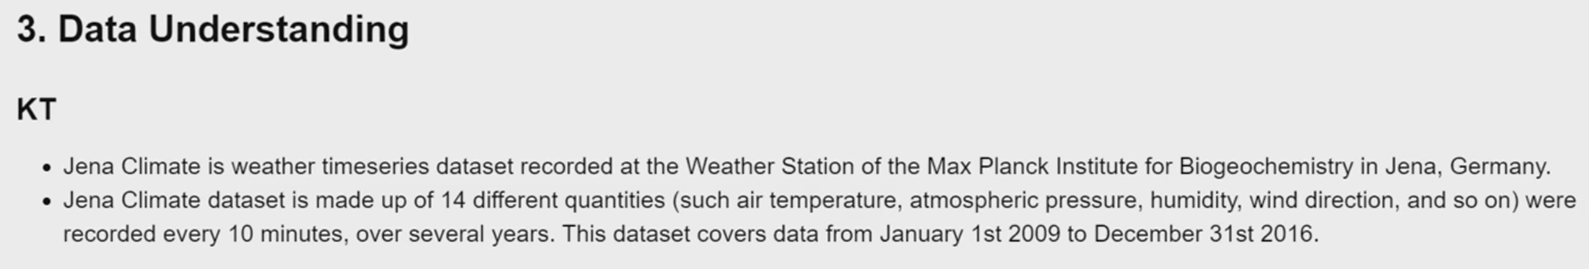

In [ ]:
jena_climate_data.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

##4. Data Preparation##

In [ ]:
jena_temp = jena_climate_data[['Date Time','T (degC)']]
jena_temp

,Date Time,T (degC)
0,01.01.2009 00:10:00,-8.02
1,01.01.2009 00:20:00,-8.41
2,01.01.2009 00:30:00,-8.51
3,01.01.2009 00:40:00,-8.31
4,01.01.2009 00:50:00,-8.27
...,...,...
420546,31.12.2016 23:20:00,-4.05
420547,31.12.2016 23:30:00,-3.35
420548,31.12.2016 23:40:00,-3.16
420549,31.12.2016 23:50:00,-4.23


In [ ]:
hourly_temp_jena_data = jena_temp[5::6]
hourly_temp_jena_data

,Date Time,T (degC)
5,01.01.2009 01:00:00,-8.05
11,01.01.2009 02:00:00,-8.88
17,01.01.2009 03:00:00,-8.81
23,01.01.2009 04:00:00,-9.05
29,01.01.2009 05:00:00,-9.63
...,...,...
420521,31.12.2016 19:10:00,-0.98
420527,31.12.2016 20:10:00,-1.40
420533,31.12.2016 21:10:00,-2.75
420539,31.12.2016 22:10:00,-2.89


In [ ]:
hourly_temp_jena_data.dtypes

Date Time     object
T (degC)     float64
dtype: object

In [ ]:
hourly_temp_jena_data['Date Time'] = pd.to_datetime(hourly_temp_jena_data['Date Time'])
hourly_temp_jena_data

,Date Time,T (degC)
5,2009-01-01 01:00:00,-8.05
11,2009-01-01 02:00:00,-8.88
17,2009-01-01 03:00:00,-8.81
23,2009-01-01 04:00:00,-9.05
29,2009-01-01 05:00:00,-9.63
...,...,...
420521,2016-12-31 19:10:00,-0.98
420527,2016-12-31 20:10:00,-1.40
420533,2016-12-31 21:10:00,-2.75
420539,2016-12-31 22:10:00,-2.89


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
hourly_temp_jena_data.dtypes

Date Time    datetime64[ns]
T (degC)            float64
dtype: object

In [ ]:
hourly_temp_jena_data.index = hourly_temp_jena_data['Date Time']

In [ ]:
hourly_temp_jena_data

,Date Time,T (degC)
Date Time,,
2009-01-01 01:00:00,2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,2009-01-01 05:00:00,-9.63
...,...,...
2016-12-31 19:10:00,2016-12-31 19:10:00,-0.98
2016-12-31 20:10:00,2016-12-31 20:10:00,-1.40
2016-12-31 21:10:00,2016-12-31 21:10:00,-2.75


In [ ]:
del hourly_temp_jena_data['Date Time']

In [ ]:
hourly_temp_jena_data

,T (degC)
Date Time,
2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,-9.63
...,...
2016-12-31 19:10:00,-0.98
2016-12-31 20:10:00,-1.40
2016-12-31 21:10:00,-2.75


In [ ]:
#visualize

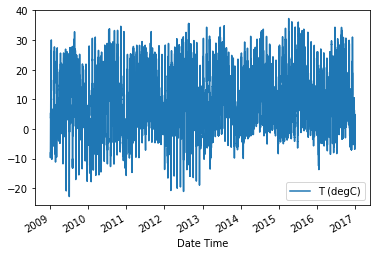

In [ ]:
hourly_temp_jena_data.plot()

In [ ]:
hourly_temp_jena_data.to_numpy()

array([[-8.05],
       [-8.88],
       [-8.81],
       ...,
       [-2.75],
       [-2.89],
       [-3.93]])

In [ ]:
len(hourly_temp_jena_data)

70091

In [ ]:
def jena_temp_to_x_y(data,window_size=5):
    data_as_numpy = data.to_numpy()
    X=[]
    y=[]

    for i in range(len(data)- window_size):
      row = [temp for temp in data_as_numpy[i:i+window_size]]
      X.append(row)

      output = data_as_numpy[i+window_size]
      y.append(output)

    return np.array(X), np.array(y)

In [ ]:
X,y = jena_temp_to_x_y(hourly_temp_jena_data)

In [ ]:
X.shape, y.shape

((70086, 5, 1), (70086, 1))

In [ ]:
X.ndim #3 dimensioanl with 70086. Each observation picks up a window size of 5  with 1 column.

3

##5. Model Building##

In [ ]:
X.shape

(70086, 5, 1)

Training Data

In [ ]:
X_train = X[:60000]
y_train = y[:60000]

Validation Data

In [ ]:
X_validation = X[60000:65000]
y_validation = y[60000:65000]

Test Data

In [ ]:
X_test = X[65000:]
y_test = y[65000:]
X_test.shape, y_test.shape

((5086, 5, 1), (5086, 1))

##6. Model Training##

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,InputLayer, LSTM,GRU, SimpleRNN

6.1 Build the Architecture

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = (5,1)))
model.add(GRU(units = 64))
model.add(Dense(units=8,activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


6.2 Model Compilation and Train

In [ ]:
model.compile(optimizer = 'adam',loss= 'mse')

In [ ]:
model.fit(x=X,y=y,epochs = 10,batch_size= 64,validation_data = (X_validation,y_validation))

Epoch 1/10
1096/1096 [==============================] - 19s 13ms/step - loss: 9.1744 - val_loss: 0.5242
Epoch 2/10
1096/1096 [==============================] - 7s 7ms/step - loss: 0.6647 - val_loss: 0.4946
Epoch 3/10
1096/1096 [==============================] - 7s 6ms/step - loss: 0.6468 - val_loss: 0.5037
Epoch 4/10
1096/1096 [==============================] - 6s 6ms/step - loss: 0.6423 - val_loss: 0.5486
Epoch 5/10
1096/1096 [==============================] - 6s 6ms/step - loss: 0.6362 - val_loss: 0.5015
Epoch 6/10
1096/1096 [==============================] - 7s 6ms/step - loss: 0.6370 - val_loss: 0.4812
Epoch 7/10
1096/1096 [==============================] - 7s 6ms/step - loss: 0.6376 - val_loss: 0.4896
Epoch 8/10
1096/1096 [==============================] - 7s 6ms/step - loss: 0.6315 - val_loss: 0.4951
Epoch 9/10
1096/1096 [==============================] - 6s 6ms/step - loss: 0.6309 - val_loss: 0.4842
Epoch 10/10
1096/1096 [==============================] - 7s 6ms/step - loss: 0.6

##7. Model Testing##

Train Data

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_train

1875/1875 [==============================] - 4s 2ms/step


array([[-9.827905 ],
       [-9.655    ],
       [-8.686133 ],
       ...,
       [12.2986355],
       [15.380152 ],
       [16.460623 ]], dtype=float32)

In [ ]:
y_pred_train.shape

(60000, 1)

In [ ]:
train_data_results = pd.DataFrame(data = {'Actual O/p': y_train.flatten(),
                                          'Predicted O/p': y_pred_train.flatten()})
train_data_results

,Actual O/p,Predicted O/p
0,-9.67,-9.827905
1,-9.17,-9.655000
2,-8.10,-8.686133
3,-7.66,-7.140091
4,-7.04,-7.027840
...,...,...
59995,6.07,6.283656
59996,9.88,7.139672
59997,13.53,12.298635
59998,15.43,15.380152


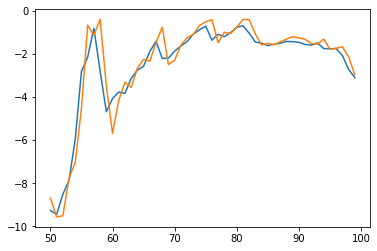

In [ ]:
plt.plot(train_data_results['Actual O/p'][50:100])
plt.plot(train_data_results['Predicted O/p'][50:100])

Validation Data

In [ ]:
y_pred_validation = model.predict(X_validation)
y_pred_validation

157/157 [==============================] - 1s 2ms/step


array([[15.782651],
       [13.573042],
       [13.201221],
       ...,
       [17.247774],
       [15.93822 ],
       [15.182674]], dtype=float32)

In [ ]:
validation_data_results = pd.DataFrame(data = {'Actual O/p': y_validation.flatten(),
                                          'Predicted O/p': y_pred_validation.flatten()})
validation_data_results

,Actual O/p,Predicted O/p
0,14.02,15.782651
1,13.67,13.573042
2,12.27,13.201221
3,11.19,11.543150
4,10.85,10.470016
...,...,...
4995,18.27,17.797525
4996,17.85,17.764286
4997,16.65,17.247774
4998,15.85,15.938220


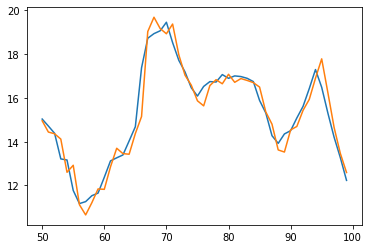

In [ ]:
plt.plot(validation_data_results['Actual O/p'][50:100])
plt.plot(validation_data_results['Predicted O/p'][50:100])

Test Data

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

159/159 [==============================] - 0s 2ms/step


array([[14.471786 ],
       [13.304159 ],
       [12.96589  ],
       ...,
       [-1.6481315],
       [-3.2092323],
       [-3.1097193]], dtype=float32)

In [ ]:
test_data_results = pd.DataFrame(data = {'Actual O/p': y_test.flatten(),
                                          'Predicted O/p': y_pred_test.flatten()})
test_data_results

,Actual O/p,Predicted O/p
0,13.99,14.471786
1,13.46,13.304159
2,12.93,12.965890
3,12.43,12.534992
4,12.17,12.085082
...,...,...
5081,-0.98,-0.982056
5082,-1.40,-1.444789
5083,-2.75,-1.648131
5084,-2.89,-3.209232


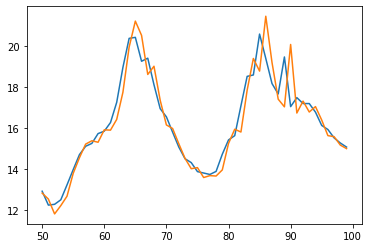

In [ ]:
plt.plot(test_data_results['Actual O/p'][50:100])
plt.plot(test_data_results['Predicted O/p'][50:100])

In [ ]:
#End